In [179]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np

In [180]:
X, y = make_classification()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [182]:
classifier = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)

In [183]:
predictions = classifier.predict(X_test)

In [184]:
print(f1_score(y_pred=predictions, y_true=y_test).round(4))

0.8276


In [294]:
from sklearn.gaussian_process import GaussianProcessRegressor
import seaborn as sns
import pandas as pd

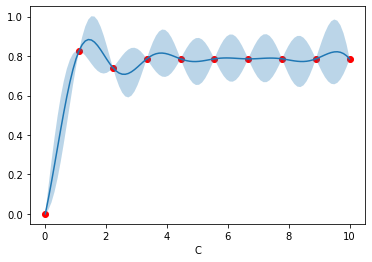

In [361]:
C_range = np.linspace(0.01, 10, 10)

input_x = []
input_y = []

for c in C_range:
    classifier_sample = make_pipeline(StandardScaler(), SVC(C=c)).fit(X_train, y_train)
    predictions = classifier_sample.predict(X_test)
    input_x.append(c)
    input_y.append(f1_score(y_pred=predictions, y_true=y_test).round(4))
    
input_x = np.array(input_x)
input_y = np.array(input_y)

gaussian = GaussianProcessRegressor().fit(input_x.reshape(-1, 1), input_y)

C_sample = np.linspace(0.01, 10, 100)
value, std = gaussian.predict(C_sample.reshape(-1, 1), return_std=True)
sampled_points = np.array(sampled_points)

for x, y in zip(input_x, input_y):
    plt.scatter(x, y, c='r')
    
plt.plot(C_sample, value)
plt.fill_between(C_sample, value - std, value + std, alpha=0.3)
plt.xlabel('C')
plt.show()